https://www.kaggle.com/code/ahmetgokkaya/pricing-derivatives-with-binomial-tree-model

This is a jumble of code to be cleaned up in later versions

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
import warnings

In [2]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

# One step Binomial Model

### This doesnt do anything useful...

In [3]:
def binomial_model(S, u, d, p):
    """
    Returns a one-period binomial model.

    Parameters:
    S (float): initial asset price
    u (float): factor by which the asset price goes up
    d (float): factor by which the asset price goes down
    p (float): probability of an up movement

    Returns:
    (tuple): a tuple containing the following elements:
        - S_0 (float): the initial asset price
        - S_u (float): the asset price after an up movement
        - S_d (float): the asset price after a down movement
        - p (float): the probability of an up movement
    """
    S_0 = S
    S_u = S * u
    S_d = S * d
    return S_0, S_u, S_d, p

In [4]:
S_0, S_u, S_d, p = binomial_model(100, 1.2, 0.9, 0.5)
print(f"S_0 = {S_0}, S_u = {S_u}, S_d = {S_d}, p = {p}")

S_0 = 100, S_u = 120.0, S_d = 90.0, p = 0.5


# Two step Binomial Model broken down into parts for easy understanding

### Keep T and n the same for simplicity sake

In [5]:
# Define the parameters of the binomial tree
S0 = 4   # Initial stock price
K = 5    # Strike price
u = 2    # Up factor
d = 0.5    # Down factor
r = 0.25    # Risk-free rate
T = 2      # Time to maturity in years
n = 2      # Number of time steps

In [6]:
# Compute the values of the underlying asset at each node of the tree
stock_values = np.zeros((n+1, n+1))
for i in range(n+1):       # Loops through the columns
    for j in range(i+1):   # Loops through the rows
        stock_values[j,i] = S0 * (u**j) * (d**(i-j))

In [7]:
stock_values

array([[ 4.,  2.,  1.],
       [ 0.,  8.,  4.],
       [ 0.,  0., 16.]])

In [8]:
# Compute the risk-neutral probabilities of moving up and down
p = (np.exp(r*T/n) - d) / (u - d)
q = 1 - p

In [9]:
print(p)
print(q)

0.5226836111251609
0.47731638887483907


In [10]:
# Compute the option values at each node of the tree
option_values = np.zeros((n+1, n+1))
for i in range(n+1):
    option_values[i,n] = max(stock_values[i,n] - K, 0)
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_values[j,i] = np.exp(-r*T/n) * (p*option_values[j,i+1] + q*option_values[j+1,i+1])


In [11]:
option_values

array([[ 1.52005092,  0.        ,  0.        ],
       [ 0.        ,  4.08907815,  0.        ],
       [ 0.        ,  0.        , 11.        ]])

In [12]:
# Print the option value at the initial node of the tree
print("Option value:", option_values[0,0])

Option value: 1.5200509209840256


In [13]:
np.exp(0)

1.0

# Put and Call Risk Neutral European options u/d example

In [14]:
# Define the parameters of the binomial tree
S = 4   # Initial stock price
K = 5    # Strike price
u = 2    # Up factor
d = 0.5    # Down factor
r = 0.25    # Risk-free rate
T = 2      # Time to maturity in years
N = 2      # Number of time steps

In [15]:
def binomial_tree_basic_european_put(S, K, r, u, d, T, N):
    """
    Calculates the price of a European put option using a multi-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        u: Up factor
        d: Down factor
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the put option
    """
    dt=T/N
    # Compute the risk-neutral probabilities of moving up and down
    p = (((1+r)**dt) - d) / (u - d)         # Check this
    q = 1 - p
    
    print(p)
    print(q)

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):                  # Loops through the columns
        for j in range(i+1):              # Loop through the rows
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)    # Initial stock price multiplied by up amount (power of number of times it went up) multiplied by down amount (power of number of time it went down)

    # Print the stock price tree
    print("Stock price tree:")
    print(stock_tree)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)    # Payoff at maturity
    for i in range(N-1, -1, -1):          # Loops through the columns
        for j in range(i+1):              # Loop through the rows
            option_tree[j, i] = (1/((1+r)**dt)) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])    # Check this
            #option_tree[j, i] = max(option_tree[j, i], K - stock_tree[j, i], 0)    # Do we need to add in a 0 here?

    # Print the option price tree
    print("Option price tree:")
    print(option_tree)

    return option_tree[0, 0]

In [16]:
def binomial_tree_basic_european_call(S, K, r, u, d, T, N):
    """
    Calculates the price of a European call option using a multi-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        u: Up factor
        d: Down factor
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the put option
    """
    dt=T/N
    # Compute the risk-neutral probabilities of moving up and down
    p = (((1+r)**dt) - d) / (u - d)          # Check this
    q = 1 - p
    
    print(p)
    print(q)

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):                  # Loops through the columns
        for j in range(i+1):              # Loop through the rows
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)    # Initial stock price multiplied by up amount (power of number of times it went up) multiplied by down amount (power of number of time it went down)

    # Print the stock price tree
    print("Stock price tree:")
    print(stock_tree)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(stock_tree[:, N] - K, 0)    # Payoff at maturity
    for i in range(N-1, -1, -1):          # Loops through the columns
        for j in range(i+1):              # Loop through the rows
            option_tree[j, i] = (1/((1+r)**dt)) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])    # Check this
            #option_tree[j, i] = max(option_tree[j, i], K - stock_tree[j, i], 0)    # Do we need to add in a 0 here?

    # Print the option price tree
    print("Option price tree:")
    print(option_tree)

    return option_tree[0, 0]

In [17]:
basic_european_put_price = binomial_tree_basic_european_put(S, K, r, u, d, T, N)
print("Put price:", basic_european_put_price)

0.5
0.5
Stock price tree:
[[ 4.  8. 16.]
 [ 0.  2.  4.]
 [ 0.  0.  1.]]
Option price tree:
[[0.96 0.4  0.  ]
 [0.   2.   1.  ]
 [0.   0.   4.  ]]
Put price: 0.96


In [18]:
basic_european_call_price = binomial_tree_basic_european_call(S, K, r, u, d, T, N)
print("Call price:", basic_european_call_price)

0.5
0.5
Stock price tree:
[[ 4.  8. 16.]
 [ 0.  2.  4.]
 [ 0.  0.  1.]]
Option price tree:
[[ 1.76  4.4  11.  ]
 [ 0.    0.    0.  ]
 [ 0.    0.    0.  ]]
Call price: 1.7600000000000002


# Put and Call Risk Neutral European options sigma example

In [19]:
def binomial_tree_european_put(S, K, r, sigma, T, N):
    """
    Calculates the price of a European put option using a multi-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the put option
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u                             # Cox-Ross-Rubinstein formulation
    p = (np.exp(r * dt) - d) / (u - d)    # Risk neutral probability of going up, this needs to be between 0 and 1

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):                  # Loops through the columns
        for j in range(i+1):              # Loop through the rows
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)    # Initial stock price multiplied by up amount (power of number of times it went up) multiplied by down amount (power of number of time it went down)

    # Print the stock price tree
    print("Stock price tree:")
    print(stock_tree)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)    # Payoff at maturity
    for i in range(N-1, -1, -1):          # Loops through the columns
        for j in range(i+1):              # Loop through the rows
            option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])
            #option_tree[j, i] = max(option_tree[j, i], K - stock_tree[j, i], 0)    # Do we need to add in a 0 here?

    # Print the option price tree
    print("Option price tree:")
    print(option_tree)

    return option_tree[0, 0]

In [20]:
def binomial_tree_european_call(S, K, r, sigma, T, N):
    """
    Calculates the price of a European call option using a multi-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the call option
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u                             # Cox-Ross-Rubinstein formulation
    p = (np.exp(r * dt) - d) / (u - d)    # Risk neutral probability of going up, this needs to be between 0 and 1

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):                  # Loops through the columns
        for j in range(i+1):              # Loop through the rows
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)    # Initial stock price multiplied by up amount (power of number of times it went up) multiplied by down amount (power of number of time it went down)

    # Print the stock price tree
    print("Stock price tree:")
    print(stock_tree)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(stock_tree[:, N] - K, 0)       # Payoff at maturity
    for i in range(N-1, -1, -1):          # Loops through the columns
        for j in range(i+1):              # Loop through the rows
            option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])
            #option_tree[j, i] = max(option_tree[j, i], stock_tree[j, i] - K, 0)      # Do we need to add in a 0 here?

    # Print the option price tree
    print("Option price tree:")
    print(option_tree)

    return option_tree[0, 0]

In [21]:
# Example usage
S = 120  # initial stock price
K = 100  # strike price
r = 0.1  # risk-free interest rate
sigma = 0.2  # stock price volatility
T = 4  # time to maturity (in years)
N = 4  # number of time steps in the binomial tree

In [22]:
european_put_price = binomial_tree_european_put(S, K, r, sigma, T, N)
print("Put price:", european_put_price)

Stock price tree:
[[120.         146.56833098 179.01896372 218.65425605 267.06491142]
 [  0.          98.24769037 120.         146.56833098 179.01896372]
 [  0.           0.          80.43840552  98.24769037 120.        ]
 [  0.           0.           0.          65.85739633  80.43840552]
 [  0.           0.           0.           0.          53.91947569]]
Option price tree:
[[ 1.11175972  0.34852741  0.          0.          0.        ]
 [ 0.          3.39773171  1.33442051  0.          0.        ]
 [ 0.          0.          9.72050048  5.10914795  0.        ]
 [ 0.          0.          0.         24.62634547 19.56159448]
 [ 0.          0.          0.          0.         46.08052431]]
Put price: 1.1117597230135445


In [23]:
european_call_price = binomial_tree_european_call(S, K, r, sigma, T, N)
print("Call price:", european_call_price)

Stock price tree:
[[120.         146.56833098 179.01896372 218.65425605 267.06491142]
 [  0.          98.24769037 120.         146.56833098 179.01896372]
 [  0.           0.          80.43840552  98.24769037 120.        ]
 [  0.           0.           0.          65.85739633  80.43840552]
 [  0.           0.           0.           0.          53.91947569]]
Option price tree:
[[ 54.07975512  72.83503632  97.14588841 128.17051424 167.06491142]
 [  0.          27.56360001  39.4613452   56.08458918  79.01896372]
 [  0.           0.           8.2858307   12.87309652  20.        ]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]]
Call price: 54.07975511944964


In [24]:
def BinomialTree(model):
    # Define initial parameters
    S = 100  # Initial stock price
    K = 100  # Strike price
    r = 0.05  # Risk-free interest rate
    sigma = 0.2  # Volatility
    T = 1  # Time to maturity (years)
    N = 1  # Number of steps

    axis_color = 'skyblue'

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Initial plot
    price = model(S, K, r, sigma, T, N)
    [line] = ax.plot(S, [price], linewidth=2, color='red', marker='o')
    ax.set_xlim([0, 200])  # x-axis limits to be adjusted as needed
    ax.set_ylim([-10, 100])  # y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option Price')
    ax.set_title(f"{model.__name__} Option Price")

    # Slider definitions
    
    S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S)
    
    rf_slider_ax = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)

    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    strike_slider_ax = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)

    sigma_slider_ax = fig.add_axes([0.25, 0.10, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)

    N_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.03], facecolor=axis_color)
    N_slider = Slider(N_slider_ax, 'N', 1, 20, valinit=N)

    # Update function for sliders
    def sliders_on_changed(val):
        S_current = S_slider.val  
        K_current = strike_slider.val
        r_current = rf_slider.val
        sigma_current = sigma_slider.val
        T_current = time_slider.val
        N_current = int(N_slider.val)

        # Recalculate option prices with updated parameters
        new_price = model(S_current, K_current, r_current, sigma_current, T_current, N_current)
        line.set_ydata([new_price])
        fig.canvas.draw_idle()

    S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    N_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        S_slider.reset()
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
        N_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # Color radio buttons
    color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    def color_radios_on_clicked(label):
        line.set_color(label)
        fig.canvas.draw_idle()
    color_radios.on_clicked(color_radios_on_clicked)

    plt.show()


Stock price tree:
[[100.         122.14027582]
 [  0.          81.87307531]]
Option price tree:
[[ 7.28522741  0.        ]
 [ 0.         18.12692469]]


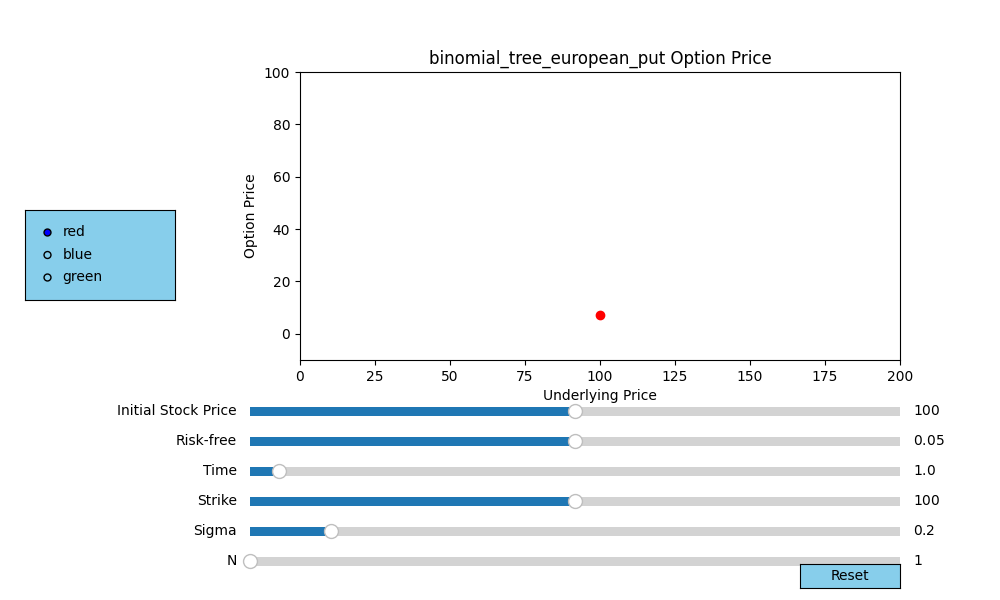

In [25]:
# Run the function with the put option model
BinomialTree(binomial_tree_european_put)

Stock price tree:
[[100.         122.14027582]
 [  0.          81.87307531]]
Option price tree:
[[12.16228496 22.14027582]
 [ 0.          0.        ]]


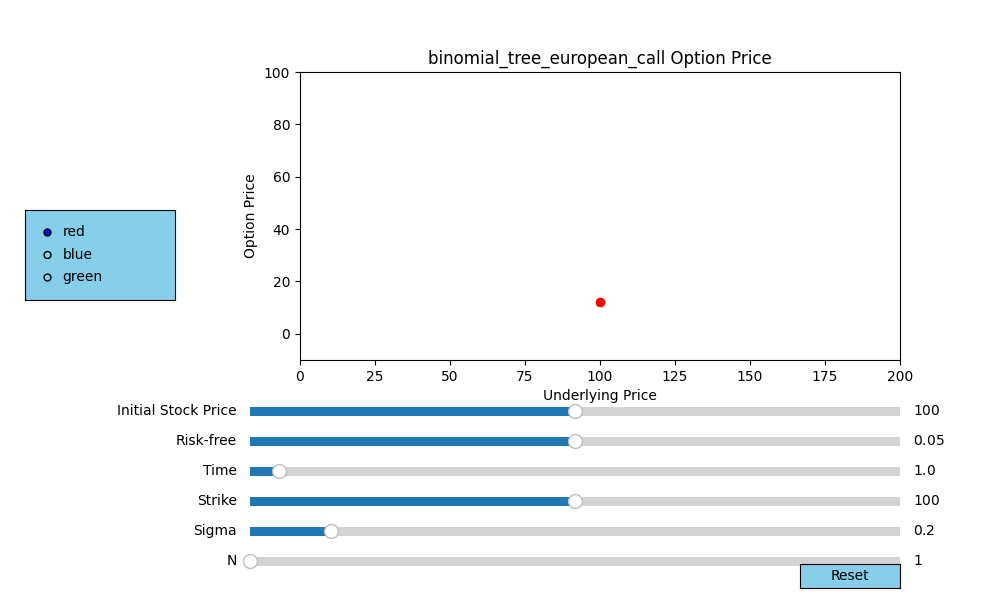

In [26]:
# Run the function with the call option model
BinomialTree(binomial_tree_european_call)

# American Options sigma example

In [27]:
def binomial_tree_american_put(S, K, r, sigma, T, N):
    """
    Calculates the price of an American put option using a multi-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the put option
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u                              # Cox-Ross-Rubinstein formulation
    p = (np.exp(r * dt) - d) / (u - d)     # Risk neutral probability of going up, this needs to be between 0 and 1

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):                   # Loops through the columns
        for j in range(i+1):               # Loops through the rows
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)   # Initial stock price multiplied by up amount (power of number of times it went up) multiplied by down amount (power of number of time it went down)

    # Print the stock price tree
    print("Stock price tree:")
    print(stock_tree)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)
    for i in range(N-1, -1, -1):          # Loops through the columns
        for j in range(i+1):              # Loops through the rows
            exercise_value = K - stock_tree[j, i]
            hold_value = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])
            option_tree[j, i] = max(exercise_value, hold_value, 0)        # Do we need to add in a 0 here?

    # Print the option price tree
    print("Option price tree:")
    print(option_tree)

    return option_tree[0, 0]

In [28]:
def binomial_tree_american_call(S, K, r, sigma, T, N):
    """
    Calculates the price of an American call option using a multi-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        sigma (float): stock price volatility
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the call option
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u                              # Cox-Ross-Rubinstein formulation
    p = (np.exp(r * dt) - d) / (u - d)     # Risk neutral probability of going up, this needs to be between 0 and 1

    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):                   # Loops through the columns
        for j in range(i+1):               # Loops through the rows
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)   # Initial stock price multiplied by up amount (power of number of times it went up) multiplied by down amount (power of number of time it went down)

    # Print the stock price tree
    print("Stock price tree:")
    print(stock_tree)
    
    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(stock_tree[:, N] - K, 0)
    for i in range(N-1, -1, -1):           # Loops through the columns
        for j in range(i+1):               # Loops through the rows
            exercise_value = stock_tree[j, i] - K
            hold_value = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])
            option_tree[j, i] = max(exercise_value, hold_value, 0)

    # Print the option price tree
    print("Option price tree:")
    print(option_tree)
    
    return option_tree[0, 0]

In [29]:
# Example usage
S = 100      # initial stock price
K = 105      # strike price
r = 0.05     # risk-free interest rate
sigma = 0.2  # stock price volatility
T = 1        # time to maturity (in years)
N = 2        # number of time steps in the binomial tree

In [30]:
american_put_price = binomial_tree_american_put(S, K, r, sigma, T, N)
print("Put price:", american_put_price)

Stock price tree:
[[100.         115.19099102 132.68964411]
 [  0.          86.81234454 100.        ]
 [  0.           0.          75.36383164]]
Option price tree:
[[ 9.08825764  2.17538834  0.        ]
 [ 0.         18.18765546  5.        ]
 [ 0.          0.         29.63616836]]
Put price: 9.088257638650122


In [31]:
american_call_price = binomial_tree_american_call(S, K, r, sigma, T, N)
print("Call price:", american_call_price)

Stock price tree:
[[100.         115.19099102 132.68964411]
 [  0.          86.81234454 100.        ]
 [  0.           0.          75.36383164]]
Option price tree:
[[ 8.08124695 14.95883859 27.68964411]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
Call price: 8.081246948239023


Stock price tree:
[[100.         122.14027582]
 [  0.          81.87307531]]
Option price tree:
[[ 7.28522741  0.        ]
 [ 0.         18.12692469]]


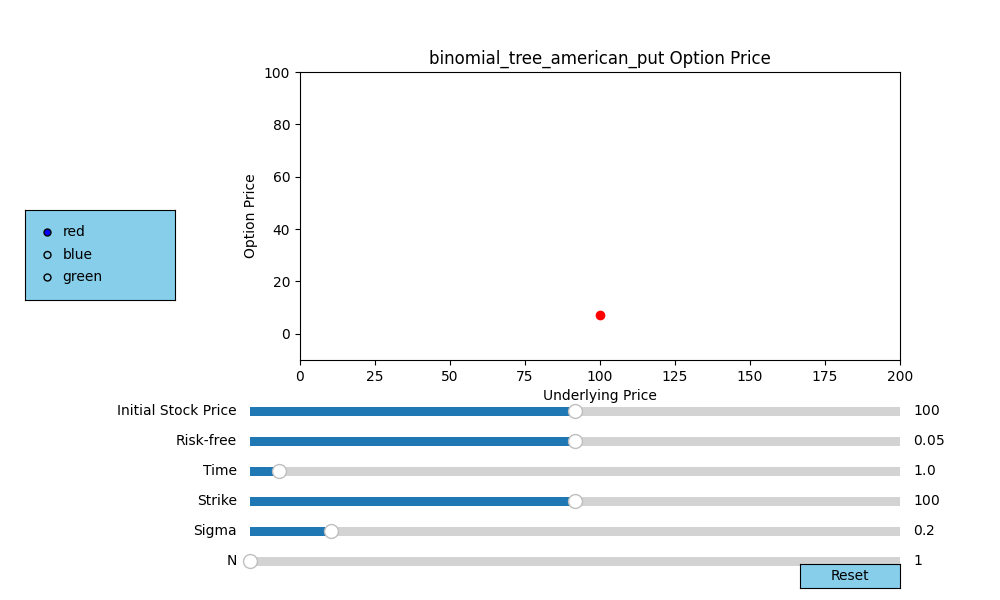

In [32]:
# Run the function with the American put option model
BinomialTree(binomial_tree_american_put)

Stock price tree:
[[100.         122.14027582]
 [  0.          81.87307531]]
Option price tree:
[[12.16228496 22.14027582]
 [ 0.          0.        ]]


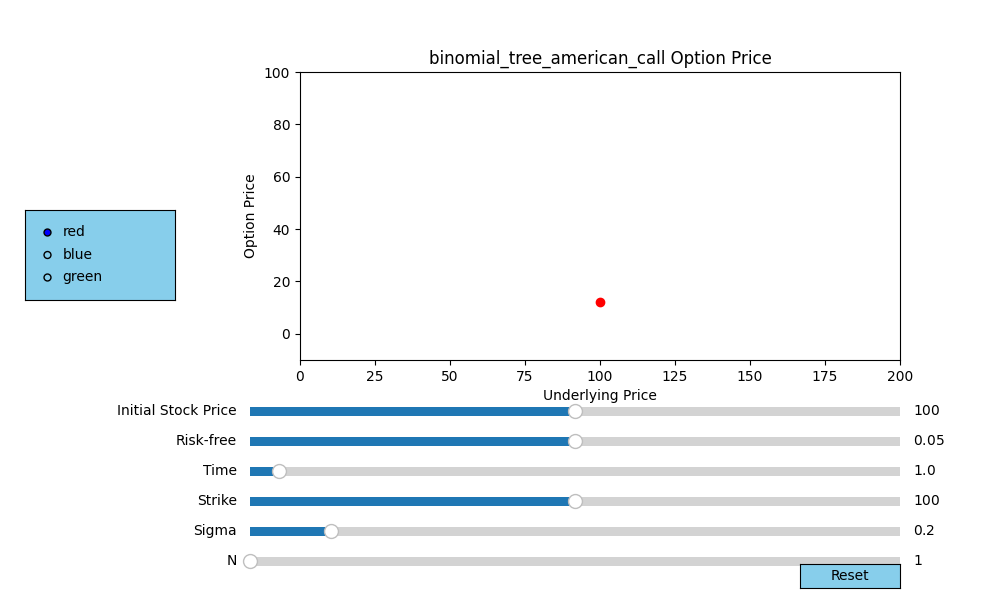

In [33]:
# Run the function with the American call option model
BinomialTree(binomial_tree_american_call)

# American Options u/d example

In [34]:
# Define the parameters of the binomial tree
S = 100    # Initial stock price
K = 100    # Strike price
u = 5      # Up factor
d = 1      # Down factor
r = 0.05   # Risk-free rate
T = 1      # Time to maturity in years
N = 1      # Number of time steps

In [35]:
def binomial_tree_basic_american_put(S, K, r, u, d, T, N):
    """
    Calculates the price of an American put option using a multi-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        u: Up factor
        d: Down factor
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the put option
    """
    dt=T/N
    # Compute the risk-neutral probabilities of moving up and down
    p = (((1+r)**dt) - d) / (u - d)          # Check this
    q = 1 - p
    
    print(p)
    print(q)
    
    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):                   # Loops through the columns
        for j in range(i+1):               # Loops through the rows
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)   # Initial stock price multiplied by up amount (power of number of times it went up) multiplied by down amount (power of number of time it went down)

    # Print the stock price tree
    print("Stock price tree:")
    print(stock_tree)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)
    for i in range(N-1, -1, -1):          # Loops through the columns
        for j in range(i+1):              # Loops through the rows
            exercise_value = K - stock_tree[j, i]
            hold_value = (1/((1+r)** dt)) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])   # Check this
            option_tree[j, i] = max(exercise_value, hold_value, 0)        # Do we need to add in a 0 here?

    # Print the option price tree
    print("Option price tree:")
    print(option_tree)

    return option_tree[0, 0]

In [36]:
def binomial_tree_basic_american_call(S, K, r, u, d, T, N):
    """
    Calculates the price of an American call option using a multi-step binomial tree.

    Parameters:
        S (float): initial stock price
        K (float): strike price
        r (float): risk-free interest rate
        u: Up factor
        d: Down factor
        T (float): time to maturity (in years)
        N (int): number of time steps in the binomial tree

    Returns:
        (float) price of the put option
    """
    dt=T/N
    # Compute the risk-neutral probabilities of moving up and down
    p = (((1+r)**dt) - d) / (u - d)      # Check this
    q = 1 - p
    
    print(p)
    print(q)
    
    # Generate the stock price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):                   # Loops through the columns
        for j in range(i+1):               # Loops through the rows
            stock_tree[j, i] = S * (u ** (i-j)) * (d ** j)   # Initial stock price multiplied by up amount (power of number of times it went up) multiplied by down amount (power of number of time it went down)

    # Print the stock price tree
    print("Stock price tree:")
    print(stock_tree)

    # Generate the option value tree
    option_tree = np.zeros((N+1, N+1))
    option_tree[:, N] = np.maximum(stock_tree[:, N] - K, 0)
    for i in range(N-1, -1, -1):          # Loops through the columns
        for j in range(i+1):              # Loops through the rows
            exercise_value = stock_tree[j, i] - K
            hold_value = (1/((1+r)** dt)) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])   # Check this
            option_tree[j, i] = max(exercise_value, hold_value, 0)        # Do we need to add in a 0 here?

    # Print the option price tree
    print("Option price tree:")
    print(option_tree)

    return option_tree[0, 0]

In [37]:
basic_american_put_price = binomial_tree_basic_american_put(S, K, r, u, d, T, N)
print("Put price:", basic_american_put_price)

0.012500000000000011
0.9875
Stock price tree:
[[100. 500.]
 [  0. 100.]]
Option price tree:
[[0. 0.]
 [0. 0.]]
Put price: 0.0


In [38]:
basic_american_call_price = binomial_tree_basic_american_call(S, K, r, u, d, T, N)
print("Call price:", basic_american_call_price)

0.012500000000000011
0.9875
Stock price tree:
[[100. 500.]
 [  0. 100.]]
Option price tree:
[[  4.76190476 400.        ]
 [  0.           0.        ]]
Call price: 4.761904761904766


In [54]:
def BasicBinomialTree(model):
    # Define initial parameters
    S = 100  # Initial stock price
    K = 100  # Strike price
    r = 0.05  # Risk-free interest rate
    u = 2    # Up factor
    d = 0.5    # Down factor
    T = 1  # Time to maturity (years)
    N = 1  # Number of steps

    axis_color = 'skyblue'

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Initial plot
    price = model(S, K, r, u, d, T, N)
    [line] = ax.plot(S, [price], linewidth=2, color='red', marker='o')
    ax.set_xlim([0, 200])  # x-axis limits to be adjusted as needed
    ax.set_ylim([-10, 100])  # y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option Price')
    ax.set_title(f"{model.__name__} Option Price")

    # Slider definitions
    
    S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S)
    
    rf_slider_ax = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.50, valinit=r)

    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    strike_slider_ax = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)

    u_slider_ax = fig.add_axes([0.25, 0.10, 0.65, 0.03], facecolor=axis_color)
    u_slider = Slider(u_slider_ax, 'Up factor', 1.0, 5.0, valinit=u)
    
    d_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.03], facecolor=axis_color)
    d_slider = Slider(d_slider_ax, 'Down factor', 0.1, 1.0, valinit=d)

    N_slider_ax = fig.add_axes([0.25, 0.01, 0.65, 0.03], facecolor=axis_color)
    N_slider = Slider(N_slider_ax, 'N', 1, 20, valinit=N)

    # Update function for sliders
    def sliders_on_changed(val):
        S_current = S_slider.val  
        K_current = strike_slider.val
        r_current = rf_slider.val
        u_current = u_slider.val
        d_current = d_slider.val
        T_current = time_slider.val
        N_current = int(N_slider.val)

        # Recalculate option prices with updated parameters
        new_price = model(S_current, K_current, r_current, u_current, d_current, T_current, N_current)
        line.set_ydata([new_price])
        fig.canvas.draw_idle()

    S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    u_slider.on_changed(sliders_on_changed)
    d_slider.on_changed(sliders_on_changed)
    N_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.025, 0.02, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        S_slider.reset()
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        u_slider.reset()
        d_slider.reset()
        N_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # Color radio buttons
    color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    def color_radios_on_clicked(label):
        line.set_color(label)
        fig.canvas.draw_idle()
    color_radios.on_clicked(color_radios_on_clicked)

    plt.show()


0.3666666666666667
0.6333333333333333
Stock price tree:
[[100. 200.]
 [  0.  50.]]
Option price tree:
[[30.15873016  0.        ]
 [ 0.         50.        ]]


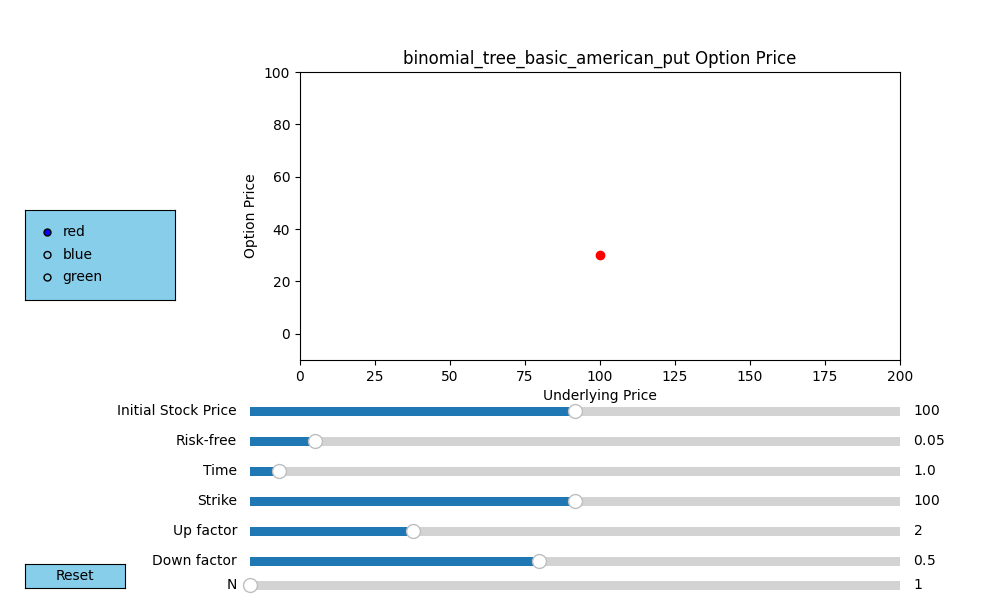

0.3695119460894426
0.6304880539105574
Stock price tree:
[[100.         200.        ]
 [  0.          49.32307692]]
Option price tree:
[[30.42970915  0.        ]
 [ 0.         50.67692308]]
0.3752529340348038
0.6247470659651961
Stock price tree:
[[100.         200.        ]
 [  0.          47.93846154]]
Option price tree:
[[30.97646991  0.        ]
 [ 0.         52.06153846]]
0.4230589554330562
0.5769410445669438
Stock price tree:
[[100.         200.        ]
 [  0.          35.33846154]]
Option price tree:
[[35.52942433  0.        ]
 [ 0.         64.66153846]]
0.4463373083475298
0.5536626916524702
Stock price tree:
[[100.         200.        ]
 [  0.          28.41538462]]
Option price tree:
[[37.74641032  0.        ]
 [ 0.         71.58461538]]
0.46615371314947696
0.533846286850523
Stock price tree:
[[100.         200.        ]
 [  0.          22.04615385]]
Option price tree:
[[39.63368697  0.        ]
 [ 0.         77.95384615]]
0.4739308229681377
0.5260691770318623
Stock price tree:

In [ ]:
BasicBinomialTree(binomial_tree_basic_american_put)

0.3666666666666667
0.6333333333333333
Stock price tree:
[[100. 200.]
 [  0.  50.]]
Option price tree:
[[ 34.92063492 100.        ]
 [  0.           0.        ]]


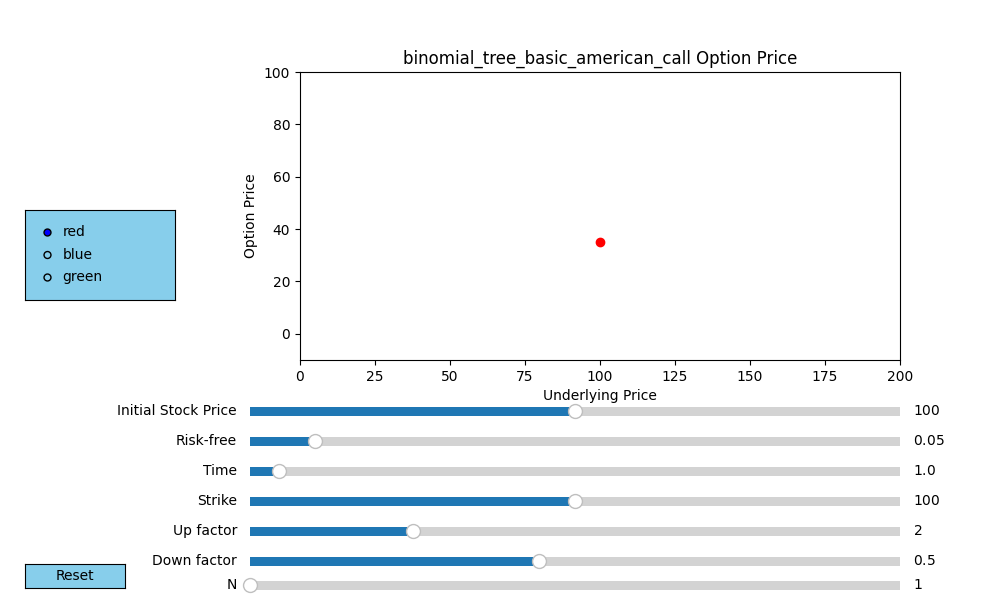

In [56]:
BasicBinomialTree(binomial_tree_basic_american_call)

# Binomial Tree Formulas

### Note that in this subsection, you are explicitly stating the probability of an up move, so you are no longer risk neutral

In [57]:
# Define the input values
S0 = 100      # Initial stock price
K = 100       # Strike Price
u = 1.1       # Up factor
d = 0.9       # Down factor
p = 0.60      # Probability of up move
r = 0.0       # Risk-free interest rate
T = 1         # Time to maturity (in years)
n = 1
dt = T / n

In [43]:
# Initialize the stock price tree
stock_tree = np.zeros((n+1, n+1))
stock_tree[0, 0] = S0

# Fill in the stock price tree
for i in range(1, n+1):
    for j in range(i+1):
        stock_tree[j, i] = S0 * u**(i-j) * d**j

In [44]:
# Print the stock price tree
print("Stock price tree:")
print(stock_tree)

Stock price tree:
[[100. 110.]
 [  0.  90.]]


In [45]:
# Initialize the option price tree
option_tree = np.zeros((n+1, n+1))

# Fill in the option price tree at the final nodes
for j in range(n+1):
    option_tree[j, n] = max(stock_tree[j, n] - K, 0)

# Work backwards through the tree to calculate the option prices at each node
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i+1] + (1-p) * option_tree[j+1, i+1])  #This is European

In [46]:
# Print the option price tree
print("Option price tree:")
print(option_tree)

Option price tree:
[[ 6. 10.]
 [ 0.  0.]]


# Risk Neutral Valuation

In [47]:
# Define the input values
S0 = 100      # Initial stock price
K = 100       # Strike Price
u = 1.1       # Up factor
d = 0.9       # Down factor
r = 0.0       # Risk-free interest rate
T = 5         # Time to maturity (in years)
n = 5
dt = T / n

In [48]:
# Compute the risk-neutral probabilities of moving up and down
p = (np.exp(r*T/n) - d) / (u - d)
q = 1 - p

In [49]:
# Define the number of time steps and initialize the stock price tree
stock_tree = np.zeros((n+1, n+1))
stock_tree[0, 0] = S0

# Fill in the stock price tree
for i in range(1, n+1):
    for j in range(i+1):
        stock_tree[j, i] = S0 * u**(i-j) * d**j


# Print the stock price tree
print("Stock price tree:")
print(stock_tree)



Stock price tree:
[[100.    110.    121.    133.1   146.41  161.051]
 [  0.     90.     99.    108.9   119.79  131.769]
 [  0.      0.     81.     89.1    98.01  107.811]
 [  0.      0.      0.     72.9    80.19   88.209]
 [  0.      0.      0.      0.     65.61   72.171]
 [  0.      0.      0.      0.      0.     59.049]]


In [50]:
# Initialize the option price tree
option_tree = np.zeros((n+1, n+1))

# Fill in the option price tree at the final nodes
for j in range(n+1):
    option_tree[j, n] = max(stock_tree[j, n] - K, 0)

# Work backwards through the tree to calculate the option prices at each node
for i in range(n-1, -1, -1):
    for j in range(i+1):
        option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i+1] + q * option_tree[j+1, i+1])

# Print the option price tree
print("Option price tree:")
print(option_tree)



Option price tree:
[[ 9.3126875 14.6870625 22.473875  33.1       46.41      61.051    ]
 [ 0.         3.9383125  6.90025   11.84775   19.79      31.769    ]
 [ 0.         0.         0.976375   1.95275    3.9055     7.811    ]
 [ 0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.       ]]


In [51]:
# Print the option price at time 0
print("Option price:", option_tree[0, 0])

Option price: 9.31268750000001


In [52]:
np.exp(0)

1.0